# 1. Loading the dataset

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "./datasets/train.txt"
train = pd.read_csv(file_path, sep='\t', header=None, names=['LABEL', 'REVIEW'])
train

,LABEL,REVIEW
0,TRUTHFULPOSITIVE,The sheraton was a wonderful hotel! When me an...
1,TRUTHFULPOSITIVE,We stayed at the Omni between Christmas and Ne...
2,DECEPTIVENEGATIVE,I was REALLY looking forward to a nice relaxin...
3,TRUTHFULNEGATIVE,"First let me say, I try not to be too critical..."
4,DECEPTIVENEGATIVE,The Ambassador East Hotel is a terrible place ...
...,...,...
1395,TRUTHFULNEGATIVE,I stayed here for 5 nights last summer. I book...
1396,TRUTHFULPOSITIVE,Stayed here for 3 nights for a Bridgestone/Fir...
1397,TRUTHFULNEGATIVE,I am staying here now and actually am compelle...
1398,TRUTHFULNEGATIVE,We stayed at this hotel with our two teenage d...


In [3]:
file_path = "./datasets/test_just_reviews.txt"
test = pd.read_csv(file_path, sep='\t', header=None, names=['REVIEW'])
test

,REVIEW
0,My family and I stayed here while we were visi...
1,WARNING! My stay at the Talbott Hotel will go ...
2,I recently stayed at the Hard Rock Hotel in Ch...
3,O.M.G best hotel ever ! i've stayed at various...
4,We became an Ambassador member just before spe...
...,...
195,The Millennium Knickerbocker Hotel has seen be...
196,We got a spanking deal at this hotel for $99 a...
197,Just back from a business trip. The Homewood i...
198,I have just returned from a lovely shopping tr...


In [4]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train['REVIEW'].values)

X_train = tokenizer.texts_to_sequences(train['REVIEW'].values)
X_test = tokenizer.texts_to_sequences(test['REVIEW'].values)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [5]:
print('Original text:')
print('\t' + train['REVIEW'].values[2])
print('Tokenized vector:')
print('\t', X_train[2])

print('Tokens of the first words:')
for word in ['I', 'was', 'REALLY', 'looking']:
    print('\t{}: {}'.format(word, tokenizer.word_index[word.lower()]))

Original text:
	I was REALLY looking forward to a nice relaxing stay at the end of a long vacation, but unfortunately that was not to be had. From the moment we arrived at the Omni, the staff was belligerent and extremely rude. They had lost our reservation and refused to give us the rate we had booked before. If we weren't so tired, we would've gone to a different hotel right then, but hindsight is 20/20. After we FINALLY got checked in after being made to wait needlessly for 45 minutes in the lobby, we decided to go down to the pool, which was tiny and kind of dirty, so we had walked all the way down there in our suits for nothing. The internet access was really slow. I will NEVER stay here again. Save yourself the headache and book somewhere else!
Tokenized vector:
	 [5, 6, 96, 188, 617, 3, 4, 63, 510, 29, 14, 1, 433, 9, 4, 198, 426, 25, 526, 17, 6, 19, 3, 33, 22, 35, 1, 690, 10, 130, 14, 1, 311, 1, 42, 6, 2, 249, 220, 26, 22, 691, 27, 169, 2, 1080, 3, 328, 52, 1, 282, 10, 22, 149, 

In [6]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 400

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[   1  419    6    4  173    8   36   43    2   15 2336 2664    7   10
   20   96  525   40   10  251    3  172    4  600 2665   10 1010  195
    3   56   51    1  158   44  363    3 1538   11    5  293    3  172
   13  223   18   43    1   41    6   39    2   21    6  656   45    9
    1 1895   53   19    1 1895    8 2666  161   47    7   26   22    4
   96   63  135  604   18  190  126    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [7]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 50)           458900    
                                                                 
 global_max_pooling1d (Glob  (None, 50)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 459454 (1.75 MB)
Trainable params: 459454 (1.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

encoder = LabelEncoder()
labels = encoder.fit_transform(train['LABEL'].values)
labels = to_categorical(labels)
labels

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = KFold(n_splits = 10)
train_accs = []
val_accs = []
val_predictions = []
val_labels = []
for train_index, val_index in kf.split(X_train, labels):
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                            output_dim=embedding_dim, 
                            input_length=maxlen))
    model.add(layers.GlobalMaxPool1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    training_data = X_train[train_index]
    training_labels = labels[train_index]
    validation_data = X_train[val_index]
    validation_labels = labels[val_index]
    model.fit(training_data, training_labels, epochs=20, validation_data=(validation_data, validation_labels), verbose=True, batch_size=10)
    _, accuracy = model.evaluate(training_data, training_labels, verbose=False)
    train_accs.append(accuracy)
    _, accuracy = model.evaluate(validation_data, validation_labels, verbose=False)
    val_predictions.append(model.predict(validation_data))
    val_labels.append(validation_labels)
    val_accs.append(accuracy)
print(train_accs)
print(val_accs)

Epoch 1/20
126/126 [==============================] - 3s 17ms/step - loss: 1.3745 - accuracy: 0.3087 - val_loss: 1.3565 - val_accuracy: 0.3571
Epoch 2/20
126/126 [==============================] - 2s 15ms/step - loss: 1.2957 - accuracy: 0.5206 - val_loss: 1.2408 - val_accuracy: 0.5429
Epoch 3/20
126/126 [==============================] - 2s 16ms/step - loss: 1.1057 - accuracy: 0.6397 - val_loss: 1.0351 - val_accuracy: 0.6714
Epoch 4/20
126/126 [==============================] - 2s 14ms/step - loss: 0.8548 - accuracy: 0.7627 - val_loss: 0.8494 - val_accuracy: 0.7143
Epoch 5/20
126/126 [==============================] - 2s 12ms/step - loss: 0.6363 - accuracy: 0.8516 - val_loss: 0.7418 - val_accuracy: 0.7714
Epoch 6/20
126/126 [==============================] - 2s 12ms/step - loss: 0.4734 - accuracy: 0.9103 - val_loss: 0.6464 - val_accuracy: 0.8071
Epoch 7/20
126/126 [==============================] - 2s 14ms/step - loss: 0.3483 - accuracy: 0.9476 - val_loss: 0.5962 - val_accuracy: 0.8000

In [10]:
np.mean(val_accs)

0.7464285731315613

In [12]:
val_predictions = np.reshape(val_predictions, (1400, 4))
val_labels = np.reshape(val_labels, (1400, 4))

[1 3 2 ... 2 2 1]
[3 3 0 ... 2 2 1]


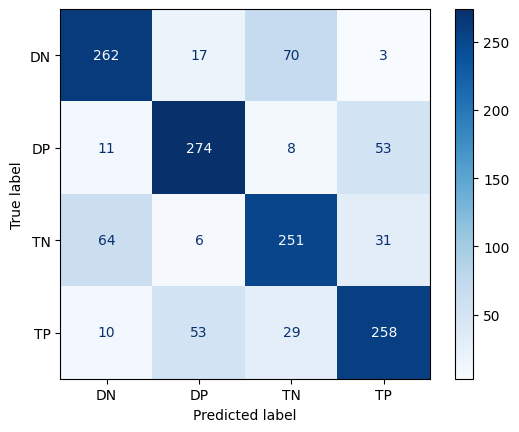

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predicted = np.argmax(val_predictions, axis=1)
print(predicted)
actual = np.argmax(val_labels, axis=1)
print(actual)
confusion_matrix = confusion_matrix(actual, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['DN', 'DP', 'TN', 'TP'])
cm_display.plot(cmap=plt.cm.Blues)

# Creating test output

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_class_labels = encoder.inverse_transform(predicted_labels)

7/7 [==============================] - 0s 4ms/step


In [ ]:
f = open("results/NN.txt", "w")
for s in predicted_class_labels:
    f.write(s + '\n')
f.close()